<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/p300_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91_%EC%A0%95%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


### 1. 크롤링(crawling), 스크래핑(scraping), 파싱(parsing)
 - 크롤링(crawling) : 웹문서의 하이퍼링크를  타고 들어 가는 행위로 스파이더링(spidering)라고도 한다.
 - 스크래핑(scraping) : 웹 사이트에서 원하는 정보를 추출하는 기술
 - 파싱(parsing) : 추출한 정보를 분석하는 기술




2. 웹 페이지 요청하기  
- urllib 패키지 : 파이썬에서 내장 모듈
- requests 패키지 : 외부모듈

3. 외부 라이브러리
   - 정적 : BeautifulSoup
   - 동적 : Selenium

4. BeautifulSoup
  - HTML과 XML 문서의 parsing을 하기 위한 python패키지이므로  이 라이브러리를 이용해 정보를 추출한다.
  - https://www.crummy.com/software/BeautifulSoup/bs4/doc/
  - https://beautiful-soup-4.readthedocs.io/en/latest/

5. Selenium
 - 'Web Applicaton'의 테스트를 자동화하기 위한 도구이다.
 - Selenium에서는 웹브라우저를 실행 시킨 후 클릭을 하거나, 텍스트를 입력하고, 지우는 등의 조작에 해당하는 메소드를 지원한다.
 - 팝업을 닫아줘야만 정상적으로 화면을 볼 수 있는 웹 사이트도 있다.
   그리고 사용하는 이유 중 가장 중요한게 바로 동적 페이지(JavaScript)로 제공하는 HTML인 경우이다.
 - 크롤링하는 도구는 BeautifulSoup사용하지만 동적으로 제어해주는 도구는 Selenium을 사용한다.

  - !pip install selenium
  - https://www.selenium.dev/
  - chromdriver.exe 다운로드 https://chromedriver.chromium.org/downloads

6. 크롤러(crawler)
   - 자동으로 웹 페이지에 있는 정보를 수집하는 프로그램이다.
   - 크롤러을 '봇', '로봇', '스파이더'라 한다.
   - 구글 등의 검색 엔진은 봇 크롤러를 사용해 전 세계에 있는 웹페이지의 정보를 모아서 축적한다. 그리고 사용자가 키워드를 검색하면 축적된 방대한 정보에서 적당한 웹페이지를 찾아서 제공해 준다.


###2 크롤링 허용 여부 확인하기
- 크로링주소/robots.txt ( https://www.daum.net/robots.txt) 
- 만약에 https://www.naver.com/robots.txt 실행했을때 robots.txt파일이 검색이 안되면 수집에 대한 정책이 없   으며 크롤링 할 수 있다고 받아들여도 된다.
- 수집정책 사이트 : http://www.robotstxt.org/

  
   |표시 | 허용여부|
   |---|---|
   |User-agent: *  | 모든 접근 허용|
   |Disallow:      ||
   | 또는          ||
   |User-agent: *  ||
   |Allow: /       ||
   |User-agent:*   |모든 접근 금지|
   |Disallow:/     ||
   |User-agent: *  | 특정 디렉토리만 접근 금지|
   |Disallow: /user/||

### 2. urllib 모듈
- URL문자열과 웹 요청에 관련된 모듈 5개 제공
 - urllib.request : URL 문자열을 가지고 요청 기능 제공
 - urllib.response : urllib 모듈에 의해 사용되는 응답 클래스들 제공
 - urllib.parse : URL 문자열을 파싱하여 해석하는 기능 제공
 - urllib.error : urllib.request에 의해 발생하는 예외 클래스 제공
 - urllib.robotparser : robots.txt파일을 구문 분석하는 기능 제공

   https://seo.tbwakorea.com/blog/robots-txt-complete-guide/     

In [ ]:
import urllib.request
from urllib.request import urlopen


In [ ]:
url = 'http://www.naver.com'
html = urlopen(url)
print(html.status)  # 응답코드 200 (정상적으로 응답을 받음)
print(type(html))  #<class 'http.client.HTTPResponse'>
print(dir(html))

lines = html.read().decode('utf-8')
#print(lines)


with open('./urllib_naver.txt', 'w', encoding='utf-8') as f:  
    f.write(lines)

200
<class 'http.client.HTTPResponse'>
['__abstractmethods__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_abc_impl', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_check_close', '_close_conn', '_get_chunk_left', '_method', '_peek_chunked', '_read1_chunked', '_read_and_discard_trailer', '_read_next_chunk_size', '_read_status', '_readall_chunked', '_readinto_chunked', '_safe_read', '_safe_readinto', 'begin', 'chunk_left', 'chunked', 'close', 'closed', 'code', 'debuglevel', 'detach', 'fileno', 'flush', 'fp', 'getcode', 'getheader', 'getheaders', 'geturl', 'headers', 'info', 'isatty', 'isclosed', 'length', 'msg', 'peek', 'r

In [ ]:
with open('./urllib_naver.txt', 'r') as f:
#  print(f.read())
   print(f.readline()) # 첫 줄이 공백임
   print(f.readline())



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 

#### http.client.HTTPResponse객체의 read() 메서드
- read() 메서드를 실행하면 웹 서버가 전달한 데이터(응답  바디)를 바이트열로 읽어 들린다.
- 바이트열
  - 16진수로 이루어진 수열이기 때문에 읽기 어려우므로 웹 서버가 보낸 한글을 포함한 텍스트 형식의 HTML문서의 내용을 읽을 때는 텍스트 형식으로 변환한다.
  - 바이트열(bytes)의 decode('문자셋')메서드를 실행하여 응답된 문자 셋에 알맞은 문자로 변환한다.


#### 웹페이지 인코딩 체크
 - 웹 크롤링하려는 웹 페이지가 어떠한 문자 셋으로 작성되었는지 파악하는 것이 필수이다.
   - 페이지의 소스 내용에서 <meta>태그의 charset정보를 체크하면 파악 가능하다.
      - `<meta charset="utf-8">`
   - 웹 페이지의 문자 셋 정보를 파이썬 프로그램으로도 파악할 수 있다.
     - urllib.request.urlopen( ) 함수의 리턴값인  http.client.HTTPResponse 객체의  info() 메소드 호출
     - http.client.HTTPMessage 객체가 리턴
     - get_content_charset( )메소드 호출
     - 문자 셋 정보를 문자열로 리턴 받음

In [ ]:
url = 'http://www.naver.com'
f = urllib.request.urlopen(url)
print(f)
print(dir(type(f.info())))
encoding = f.info().get_content_charset()
print(encoding)

['__bytes__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_params_preserve', 'add_header', 'as_bytes', 'as_string', 'attach', 'del_param', 'get', 'get_all', 'get_boundary', 'get_charset', 'get_charsets', 'get_content_charset', 'get_content_disposition', 'get_content_maintype', 'get_content_subtype', 'get_content_type', 'get_default_type', 'get_filename', 'get_param', 'get_params', 'get_payload', 'get_unixfrom', 'getallmatchingheaders', 'is_multipart', 'items', 'keys', 'raw_items', 'replace_header', 'set_boundary', 'set_charset', 'set_default_type', 'set_param', 'set_payload', 'set_raw', 'set_type', 'set_

### 3 requests 모듈
 - Kenneth Reitz에 의해 개발된 파이썬 라이브러리이다.
 - HTTP 프로토콜과 관련된 기능을 지원한다.  
 - anaconda에서는 site-package로 설치되어 있음
 -만약에 필요하면  !pip install requests
 - requests.request(method, url, **kwargs)에서 제공해주는 함수
   - method : 요청 방식 지정(GET, POST, HEAD, PUT, DELETE, OPTIONS)
   - url : 요청할 대상 URL 문자열 지정
   - params : [선택적]요청시 전달 할  Query문자열 지정(딕셔너리, 튜플, 리스트, 바이트열 가능)
   - data : [선택적]요청시 바디에 담아서 전달할 요청 파라미터 지정(딕셔너리, 튜플, 리스트, 바이트열 가능)
   - json : [선택적] 요청시 바디에 담아서 전달할 json타입의 객체 지정
   - auth : [선택적]인증처리(로그인)에 사용할 튜플 지정
 - requests. request( )함수에 요청 방식을 지정하여 호출하는 것과 동일한 함수를 지원한다.
    - requests.get(url, params=None, **kwargs)
    - requests.post(url, data=None, json=None)
    - requests.delete(url, **kwargs)
 - requests.models.Response객체(응답객체)
   - text
       - 문자열 형식으로 응답 컨텐츠 추출
       - 추출시 사용되는 문자셋은 'ISO-8859-1'이므로 'utf-8'이나 'euc-kr' 문자셋으로 작성된 콘텐츠 추출시 한글이 깨지는 현상 발생
       - 추출전 응답되는 컨텐츠의 문자셋정보를 파악하여 Response객체의 encoding속성에 문자 셋 정보를 설정한 후 추출

  - content
      - 바이트열 형식으로 응답 콘텐츠 추출
      - 응답 콘텐츠가 이미지와 같은 바이너리 형식은 경우 사용
      - 한글이 들어간 문자열 형식인 경우 r.content.decode('utf-8')를 사용해서 디코드 해야함
      


<Response [200]>
<class 'requests.models.Response'>
['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']
200
<class 'str'>
<class 'bytes'>
b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</titl
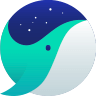
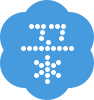

In [ ]:
import requests

url = 'http://www.naver.com'
cont = requests.get(url)
print(cont)  # <Response [200]>
print(type(cont)) #<class 'requests.models.Response'>
print(dir(cont))
print(cont.status_code) # 200
print(type(cont.text))
#print(cont.text) # String 자료형으로 반환
print(type(cont.content))
print(cont.content) # 바이트열 자료형으로 반환


### 4. urllib  VS request
- urllib
   - 인코딩하여 바이너리 형태로 데이터 전송
   - 데이터 전달 방식에 따라 GET요청, POST요청을 구분
- requests
   - 딕셔너리 형태로 데이터 전송
   - 요청메서드 (GET, POST)를 명시하여 요청   


In [ ]:
!pwd

/content


### 5 BeautifulSoup
- HTML 및 XML 파일에서 데이터를 추출하기 위한 파이썬 라이브러리이다.
- 파이썬에서 기본적으로 제공하는 라이브러리가 아니므로 별도 설치가 필요하다.
   - Anaconda에는 BeautifulSoup 패키지가 Site-package로 설치되어 있다.
   - pip install beautifulSoup4
- HTML 및 XML 파일의 내용을 읽을 때 다음 파서(Parser)를 이용한다.
   - html.parser, lxml, lxml-xml, html5lib
   - 파이썬이 내장하고 있는 파서 사용 가능
   - 좀 더 성능이 좋은 파서를 추가로 설치하여 사용 가능   
   - 파서 라이브러리(Parser Library) 비교
     ![parser](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc28GWb%2FbtqCtX7fBRN%2FnRwJ7DSP8dtjjBxGwfGv10%2Fimg.png)
   
- HTML파싱
  - BeautifulSoup의 메인 패키지인 bs 패키지에서 BeautifulSoup( )함수 임포트
  - 파싱할 HTML문서와 파싱에 사용할 파서(구문분석기)를 지정하여 호출
  - HTML 문서에 대한 파싱이 끝나면 트리 구조 형식으로 DOM 객체 생성 

- bs4.BeautifulSoup 객체의 태그 접근 방법
  - HTML문서를 파싱하고 bs4.BeautifulSoup 객체생성  
  - <html>, <head>태그와 <body>태그는 제외하고 접근하려는 태그에 계층 구조를 적용
  - 태그명을 (.)연산자와 함께 사용
    - bs.태그명
    - bs.태그명.태그명
    - bs.태그명.태그명.태그명
    - bs.html.body.h1

- bs4.element.Tag 객체의 주요 속성과 메서드
  - 태그명 속출
     - bs.태그명.name
  - 속성 속출
    - bs.태그명['속성명']
    - bs.태그명.attrs
  - 콘텐츠 추출
    - bs.태그명.string
    - bs.태그명.text
    - bs.태그명.contents
    - bs.태그명.strings
    - bs.태그명.get_text( )
- 태그로 부터 다른 태그로 이동
   - 부모 태그 추출
     - bs.태그명.parent
   - 자식 태그들 추출
     - bs.태그명.children
   - 형제 태그 추출
     - bs.태그명.next_sibling
     - bs.태그명.previous_sibling
     - bs.태그명.next_siblings
     - bs.태그명.previous_siblings
   - 자손 태그들 속출
     - bs.태그명.descendants

- bs4.BeautifulSoup 객체의 주요 메서드
   - HTML문서에 대한 파싱이 끝나고 생성된 트리 구조 형식의 DOM객체
   - 태그 찾기 기능의 주요 메서드
      - find_all( ) 4버전 => findAll()  3버전
      - find( )
      - select( )
      - find_parents( ) 및 find_parent( )
      - find_next_siblings( )및 find_next_sibling( )
      - find_previous_siblings( ) 및 find_previous_sibling( )
      - find_all_next( ) 및 find_next( )
      - first_all_previous( ) 및 first_previous( )




  




#### bs.find( )
- 주어진 기준에 맞는 태그 한 개만 리턴
- 결과는 존재하면 bs4.element.Tag 리턴하고 없으면 None을 리턴한다.
- find()는 find_all()에 limit=1로 설정한 것과 동일하게 수행



In [ ]:
import requests
import bs4

url = 'http://www.naver.com'
res = requests.get(url)

#print(res.text)

#BeautifulSoup(parsing할 데이터, parsing방법)
# res.text를 html으로 파싱
bs_obj2 = bs4.BeautifulSoup(res.text, 'html.parser')
#print(bs_obj2)
print(bs_obj2.find('div'))

print('-------------------------')
bs_obj3 = bs4.BeautifulSoup(res.text, 'lxml')
print(type(bs_obj3))  # <class 'bs4.BeautifulSoup'>
print(type(bs_obj3.find('div')))  # <class 'bs4.element.Tag'>
print(bs_obj3.find('xk'))   # 결과값이 없으면 None으로 리턴 
bs_obj3.find('div')


<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>
-------------------------
<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
None


<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>

### 소스 예제

In [ ]:


html_str = """<!DOCTYPE html>
<html>
  <body>
    <ul class="ko">
       <li>
           <p> Previous Element1</p>
           <p> Previous Element2</p>
           <a  href ="https://www.naver.com"> 네이버</a>
           <p> Next Element1</p>
           <p> Next Element2</p>
       </li>

        <li>
           <a  href ="https://www.daum.net"> 다음</a>
       </li>       
    </ul>

    <ul class="sns">
       <li>
          <a href="https://www.google.com">구글</a>
       </li>
       <li>
          <a href="https://www.facebook.com">페이스북</a>
       </li>
    </ul>
    <div id="result">page</div>
  </body>
</html>
"""

In [ ]:
import bs4
bs_obj = bs4.BeautifulSoup(html_str, 'html.parser')

#### find(  )


In [ ]:
print(type(bs_obj))  #<class 'bs4.BeautifulSoup'>


<class 'bs4.BeautifulSoup'>


In [ ]:
print(bs_obj.find('div'))           #<div id="result">page</div>
print(type(bs_obj.find('div')))      #<class 'bs4.element.Tag'>
print(dir(bs_obj.find('div')))
print(bs_obj.find('div').text)  # page

<div id="result">page</div>
<class 'bs4.element.Tag'>
['HTML_FORMATTERS', 'XML_FORMATTERS', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_attr_value_as_string', '_attribute_checker', '_find_all', '_find_one', '_formatter_for_name', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_select_debug', '_selector_combinators', '_should_pretty_print', '_tag_name_matches_and', 'append', 'attribselect_re', 'attrs', 'can_be_empty_element', 'childGenerator', 'children', 'clear', 'contents', 'decode', 'decode_contents', 'decompose', 'd

In [ ]:
ulEle = bs_obj.find('ul')
print(ulEle)
print('--------------------------')
ul_li = ulEle.find('li')
print(ul_li)
print(type(ul_li))  # <class 'bs4.element.Tag'>
print(ul_li.text)

<ul class="ko">
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>
--------------------------
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<class 'bs4.element.Tag'>

 네이버



#### find_all( )
- 주어진 기준에 맞는 모든 태그들을 가져옴 
- 결과는 bs4.element.ResultSet 객체로 리턴
- 호출 방법
   - find_all('div')
   - find_all(['p', 'img'])
   - find_all(True)
   - find_all(re.compile('^b'))
   - find_all(id='link')
   - find_all(src=re.compile('png$'), id='fid')
   - find_all('a', limit=2)


In [ ]:

ul = bs_obj.find('ul')
ul_li = ul.find_all('li')
print(ul_li)
print(type(ul_li)) # <class 'bs4.element.ResultSet'>
print(dir(ul_li))

print(ul_li[0])
print(ul_li[1])

for element in ul_li:
  print(element.text)

[<li>
<a href="https://www.naver.com"> 네이버</a>
</li>, <li>
<a href="https://www.daum.net"> 다음</a>
</li>]
<class 'bs4.element.ResultSet'>
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort', 'source']
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>

 네이버


 다음



#### class속성 이용하기  tag_and_property

In [ ]:
ul_reply = bs_obj.find('ul')
print(ul_reply)
print('-----------------------------')

ul_ko = bs_obj.find('ul', {'class':'ko'})
print(ul_ko)
print('=================================')
ul_sns = bs_obj.find('ul',attrs={'class':'sns'} )
print(ul_sns)

print('----------------------------')
ul_li = ul_sns.find_all('li')
for li in ul_li:
  print(li.text)


<ul class="ko">
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>
-----------------------------
<ul class="ko">
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>
<ul class="sns">
<li>
<a href="https://www.google.com">구글</a>
</li>
<li>
<a href="https://www.facebook.com">페이스북</a>
</li>
</ul>
----------------------------

구글


페이스북



#### 속성값 가져오기 property_href

In [ ]:
atag = bs_obj.find('a')
print(atag)
print(atag['href'])
print(type(atag['href']))

<a href="https://www.naver.com"> 네이버</a>
https://www.naver.com
<class 'str'>


In [ ]:
atag = bs_obj.find_all('a')
print(atag)
print(len(atag))

print('--------------------------')
for atn in atag:
  print(atn['href'])

[<a href="https://www.naver.com"> 네이버</a>, <a href="https://www.daum.net"> 다음</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
4
--------------------------
https://www.naver.com
https://www.daum.net
https://www.google.com
https://www.facebook.com


In [ ]:
bs_obj.find('a').attrs
print(type(bs_obj.find('a').attrs))

<class 'dict'>


In [ ]:
# id속성의 값이 'result'인 태그를 가져온다.
dv= bs_obj.find(id='result')
print(dv)
print(type(dv))

<div id="result">page</div>
<class 'bs4.element.Tag'>


In [ ]:
#uclass = bs_obj.find(class_='ko')
uclass = bs_obj.find(True, {'class':'ko'})
print(uclass)
print('===========================')
uclass = bs_obj.find(False, {'class':'ko'})
print(uclass)

<ul class="ko">
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>
<ul class="ko">
<li>
<a href="https://www.naver.com"> 네이버</a>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>


In [ ]:
# single element
print(bs_obj.find('a'))
print(bs_obj.a)

print(bs_obj.find('a').get_text())
print(type(bs_obj.find('a').get_text()))
print(bs_obj.a.get_text())
print(type(bs_obj.a.get_text()))

# get_text( )
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#get-text

<a href="https://www.naver.com"> 네이버</a>
<a href="https://www.naver.com"> 네이버</a>
 네이버
<class 'str'>
 네이버
<class 'str'>


In [ ]:
# multi element
print(bs_obj. find_all('a'))

print(bs_obj.find_all('a')[0].get_text( ))
print(bs_obj.find_all('a')[1].get_text( ))
print(bs_obj.find_all('a')[2].get_text( ))

print(type(bs_obj. find_all('a')))
print(type(bs_obj. find('a')))

[<a href="https://www.naver.com"> 네이버</a>, <a href="https://www.daum.net"> 다음</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
 네이버
 다음
구글
<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>


In [ ]:
#attribute
print(bs_obj.attrs)
print(bs_obj.find('a').attrs)

print(bs_obj.a['href'])
print(bs_obj.a.attrs['href'])
print(bs_obj.a.get('href'))

{}
{'href': 'https://www.naver.com'}
https://www.naver.com
https://www.naver.com
https://www.naver.com


In [ ]:
# children
print(bs_obj.ul.children)
print(type(bs_obj.ul.children))

for sub in bs_obj.ul.children:
  print(sub)

print('==============================')

for sub in bs_obj.find_all('ul')[1].children:
 print(sub)

<class 'list_iterator'>


<li>
<a href="https://www.naver.com"> 네이버</a>
</li>


<li>
<a href="https://www.daum.net"> 다음</a>
</li>




<li>
<a href="https://www.google.com">구글</a>
</li>


<li>
<a href="https://www.facebook.com">페이스북</a>
</li>




In [ ]:
# siblings
print(bs_obj.find('a').next_siblings)
ele = bs_obj.find('a').next_siblings
# next(ele)

cnt = 0
for subNext in ele:
  cnt += 1
  print(subNext)
print(cnt)

<generator object PageElement.next_siblings at 0x7f61386d09e0>


<p> Next Element1</p>


<p> Next Element2</p>


5


In [ ]:
# 정규 표현식과 람다식
import re

print(bs_obj.find('a', {'href':'https://www.naver.com'}))
print(bs_obj.find('a', {'href': re.compile('.*com')}))
print(bs_obj.find('a', {'href': re.compile('.*naver.*')}))
print(bs_obj.find('a', {'href': re.compile('naver')}))

print("==============================================================")
print(bs_obj.find_all('a', {'href': re.compile('.*com')}))
print(bs_obj.find_all('a', {'href': re.compile('.*naver.*')}))
print(bs_obj.find_all('a', {'href': re.compile('naver')}))

print("==============================================================")
print(bs_obj.find(href=lambda val : val))
print(bs_obj.find(href=lambda val : val and 'daum' in val))
print("===========================================================")
print(bs_obj.find(class_=lambda val:val))
print("===========================================================")
print(bs_obj.find(class_=lambda val : val and 'sns' in val))

<a href="https://www.naver.com"> 네이버</a>
<a href="https://www.naver.com"> 네이버</a>
<a href="https://www.naver.com"> 네이버</a>
<a href="https://www.naver.com"> 네이버</a>
[<a href="https://www.naver.com"> 네이버</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
[<a href="https://www.naver.com"> 네이버</a>]
[<a href="https://www.naver.com"> 네이버</a>]
<a href="https://www.naver.com"> 네이버</a>
<a href="https://www.daum.net"> 다음</a>
<ul class="ko">
<li>
<p> Previous Element1</p>
<p> Previous Element2</p>
<a href="https://www.naver.com"> 네이버</a>
<p> Next Element1</p>
<p> Next Element2</p>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>
<ul class="sns">
<li>
<a href="https://www.google.com">구글</a>
</li>
<li>
<a href="https://www.facebook.com">페이스북</a>
</li>
</ul>


#### select( ) vs select_one( )
- 주어진 CSS 선택자에 맞는 모든 태그를 가져옴 
- 결과는 list객체로 리턴
- CSS선택자를 적용한 호추
  -  select('태그명')
  -  select('.클래스명')
  -  select('#아이디명')
  -  select('태그명.클래스명')
  -  select('상위태그명>자식태그명>손자태그명')
  -  select('태그명:nth-of-type(2)')
  -  select('태그명[속성]')

In [ ]:
ul_ = bs_obj.select_one('ul')
print(ul_)
print(type(ul_))
print('------------------------------')
ul_li = bs_obj.select_one('ul > li')  #  > 양쪽에 공백 처리해야함
print(ul_li)

<ul class="ko">
<li>
<p> Previous Element1</p>
<p> Previous Element2</p>
<a href="https://www.naver.com"> 네이버</a>
<p> Next Element1</p>
<p> Next Element2</p>
</li>
<li>
<a href="https://www.daum.net"> 다음</a>
</li>
</ul>
<class 'bs4.element.Tag'>
------------------------------
<li>
<p> Previous Element1</p>
<p> Previous Element2</p>
<a href="https://www.naver.com"> 네이버</a>
<p> Next Element1</p>
<p> Next Element2</p>
</li>


In [ ]:
print(bs_obj.select('a'))
print(type(bs_obj.select('a')))


[<a href="https://www.naver.com"> 네이버</a>, <a href="https://www.daum.net"> 다음</a>, <a href="https://www.google.com">구글</a>, <a href="https://www.facebook.com">페이스북</a>]
<class 'list'>


In [ ]:
bs_obj.select('.ko')

[<ul class="ko">
 <li>
 <p> Previous Element1</p>
 <p> Previous Element2</p>
 <a href="https://www.naver.com"> 네이버</a>
 <p> Next Element1</p>
 <p> Next Element2</p>
 </li>
 <li>
 <a href="https://www.daum.net"> 다음</a>
 </li>
 </ul>]

In [ ]:
bs_obj.select('#result')

[<div id="result">page</div>]

In [ ]:
#  nth_child(n) : 부모 엘리먼트의 모든 자식 엘리먼트 중 n번째
# nth_of_type(n) : 부모 엘리먼트의  특정 자식 엘리먼트 중 n번째
bs_obj.select('ul.sns > li:nth-of-type(2)')      

[<li>
 <a href="https://www.facebook.com">페이스북</a>
 </li>]

In [ ]:
ul_li = bs_obj.select('ul > li')
print(ul_li)
print('---------------------------')
for liElement in ul_li:
 # print(liElement)
  print(liElement.text)


[<li>
<p> Previous Element1</p>
<p> Previous Element2</p>
<a href="https://www.naver.com"> 네이버</a>
<p> Next Element1</p>
<p> Next Element2</p>
</li>, <li>
<a href="https://www.daum.net"> 다음</a>
</li>, <li>
<a href="https://www.google.com">구글</a>
</li>, <li>
<a href="https://www.facebook.com">페이스북</a>
</li>]
---------------------------

 Previous Element1
 Previous Element2
 네이버
 Next Element1
 Next Element2


 다음


구글


페이스북



In [ ]:
print(bs_obj.select_one('a'))

print(type(bs_obj.select_one('a'))) #find('a)와 타입이 같음
print(type(bs_obj.select('a')))     # find_all('a') 리턴타입이 ResultSet이므로 다르다   

<a href="https://www.naver.com"> 네이버</a>
<class 'bs4.element.Tag'>
<class 'list'>


### 응답코드가 406일 때 문제해결 방법
 - 웹 url을 통해서 데이터를 가져올 때 요청에 유저(사용자) 에이전트 헤더를 검사한다.
 - 그리고 urllib.request.urlopen은 SSL 인증서 에러가 난다.
 - 문제해결방법
     - requests.get(url,  headers=header)

In [ ]:
import bs4
import requests

url = 'https://www.melon.com/'
header = {"User-Agent":"Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Mobile Safari/537.36"}
res = requests.get(url,headers= header)
print(res)  #<Response [406]>

bs_melon = bs4.BeautifulSoup(res.text, 'html.parser')
print(type(bs_melon))
#print(bs_melon)


<Response [200]>
<class 'bs4.BeautifulSoup'>


### GET 방식의 request

In [ ]:
def getDownload( url, param = None, retries = 5 ):
    resp = None
    try:
        resp = requests.get( url, params = param )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return getDownload( url, param, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    return resp

In [ ]:
url = 'http://www.crawler-test.com/status_codes/status_500'
getDownload( url )

Retries : 5
Retries : 4
Retries : 3
Retries : 2
Retries : 1
500
Internal Server Error
{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


<Response [500]>

### POST 방식 request

In [ ]:
def postDownload( url, data = None, param = None, retries = 3 ):
    resp = None
    try:
        resp = requests.post( url, data, params = param )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return postDownload( url, param, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    return resp

In [ ]:
url = 'http://pythonscraping.com/pages/files/processing.php'
data = { 'firstname':'테스트', 'lastname':1234 }

In [ ]:
html = postDownload( url, data )
print( html.request.body )
print( '------------------------------' )
print( html.request.headers )
html.text

None
------------------------------
{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


'Hello there,  !'

### Cookie 활용

In [ ]:
import requests

In [ ]:
def postDownloadCookie( url, data = None, param = None,
                           cookie = None, retries = 3 ):
    resp = None
    try:
        resp = requests.post( url, data = data, cookies = cookie, params = param )
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print( 'Retries : {0}'.format( retries ) )
            return postDownloadCookie( url, data, param, cookie, retries - 1 )
        else:
            print( resp.status_code )
            print( resp.reason )
            print( resp.request.headers )
    return resp

In [ ]:
url = 'http://pythonscraping.com/pages/files/processing.php'
data = { 'firstname':'test', 'lastname':1234 }

In [ ]:
html = postDownloadCookie( url, data )
cookie = html.cookies.get_dict()

html = postDownloadCookie( url, data, cookie )
print(html.text)

session = requests.Session()
data = { 'username':'test', 'password':'password' }

html = session.post( url, data )
print(html.text)

html = session.post( url )
print(html.text)

Hello there,  !
Hello there,  !
Hello there,  !


#### naver에서 class속성의 값이 2개 이상일때

In [ ]:
header = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}

url = requests.get('https://news.naver.com', headers=header)
print(url)
print(type(url))  #<class 'requests.models.Response'>

html = bs4.BeautifulSoup(url.text, 'html.parser')

newsnow = html.find('div',{'class' : 'cjs_journal_wrap _item_contents'})
 
#print(newsnow)

print(re.findall('[a-z가-힣]+', newsnow.text))




<Response [200]>
<class 'requests.models.Response'>
['관점', '올해의', '사진과', '정부예산의', '민낯', '역사', '장식한', '컷', '미', '월스트리트저널', '은', '해마다', '올해의', '사진', 'he', 'ear', 'in', 'hotos', '을', '발표한다', '앙겔라', '메르켈', '독일', '총리의', '열정적인', '제스처를', '버락', '오바마', '미국', '대통령이', '바라보는', '모습', '년']
